# Machine Learning Intern at Infopillar Solutions for November 2021 Batch

# Author : Anand Bhausaheb Kharabe

# Task 1 : Loan Prediction using Machine Learning

Project idea – The idea behind this ML project is to build a model that will classify how much loan the user can take. It is based on the user’s marital status, education, number of dependents, and employments. You can build a linear model for this project.

Dataset: http://lib.stat.cmu.edu/datasets/boston

# Importing all libraries required in this notebook

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# Read the csv file of Boston.csv store it into variable name called t1

In [9]:
t1 = pd.read_csv("Boston.csv")
t1

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Exploratary Data Analysis

In [10]:
t1.head(5) # Shows first five rows of the data from variable tsftask1

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
t1.tail(5)# Shows last five rows of the data from variable tsftask1

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [12]:
t1.shape # Shows the shape of the data in tuple format

(506, 15)

In [13]:
t1.isna().sum()# Check whether data contain NA value

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [14]:
t1.info()# shows the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [16]:
t1.describe() # shows the Statistical details 

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
t1 = t1.drop("Unnamed: 0", axis=1) # This column is not usefull for prediction it contian serail number of rows 

In [18]:
t1.columns # Showa the name of the columns from the data

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

<AxesSubplot:>

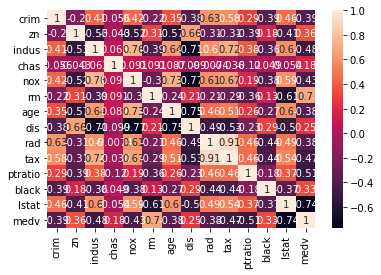

In [20]:
sns.heatmap(t1.corr(),annot=True) # heatmap of correlation matrix

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

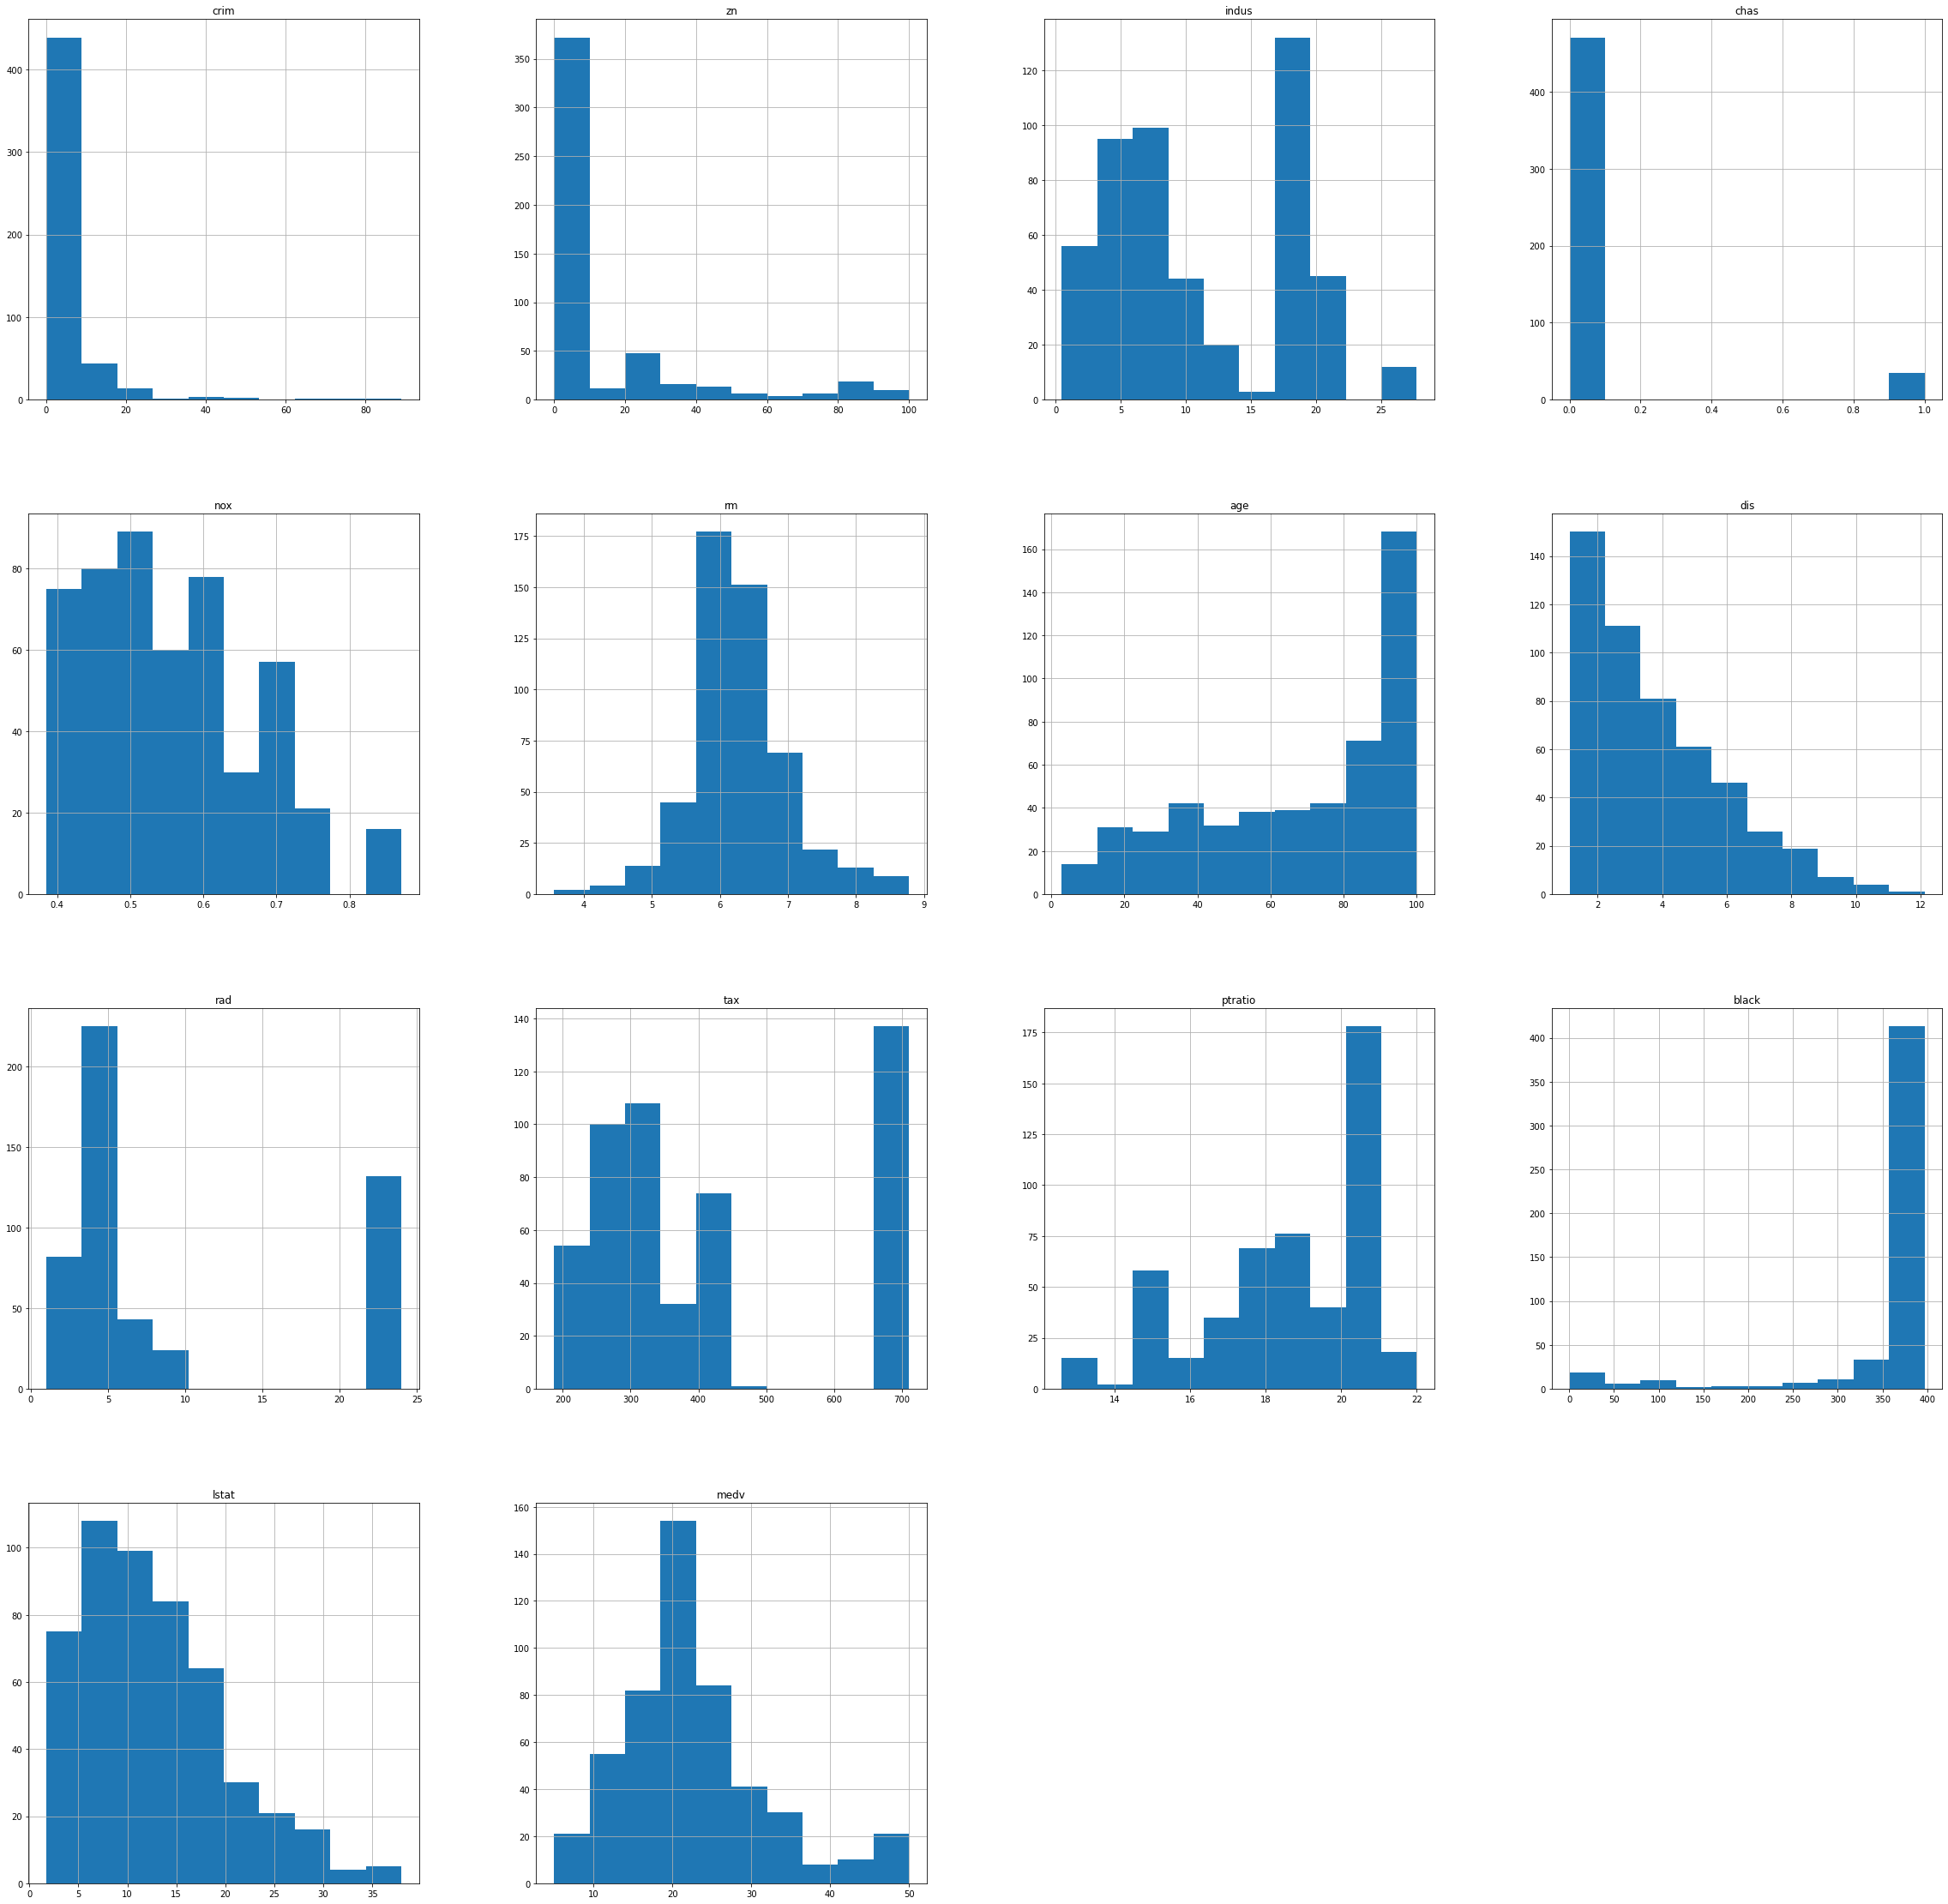

In [28]:
# creating histograms to visualize all the data
fig = plt.figure(figsize = (40,40))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.gca()
t1.hist(ax = ax)

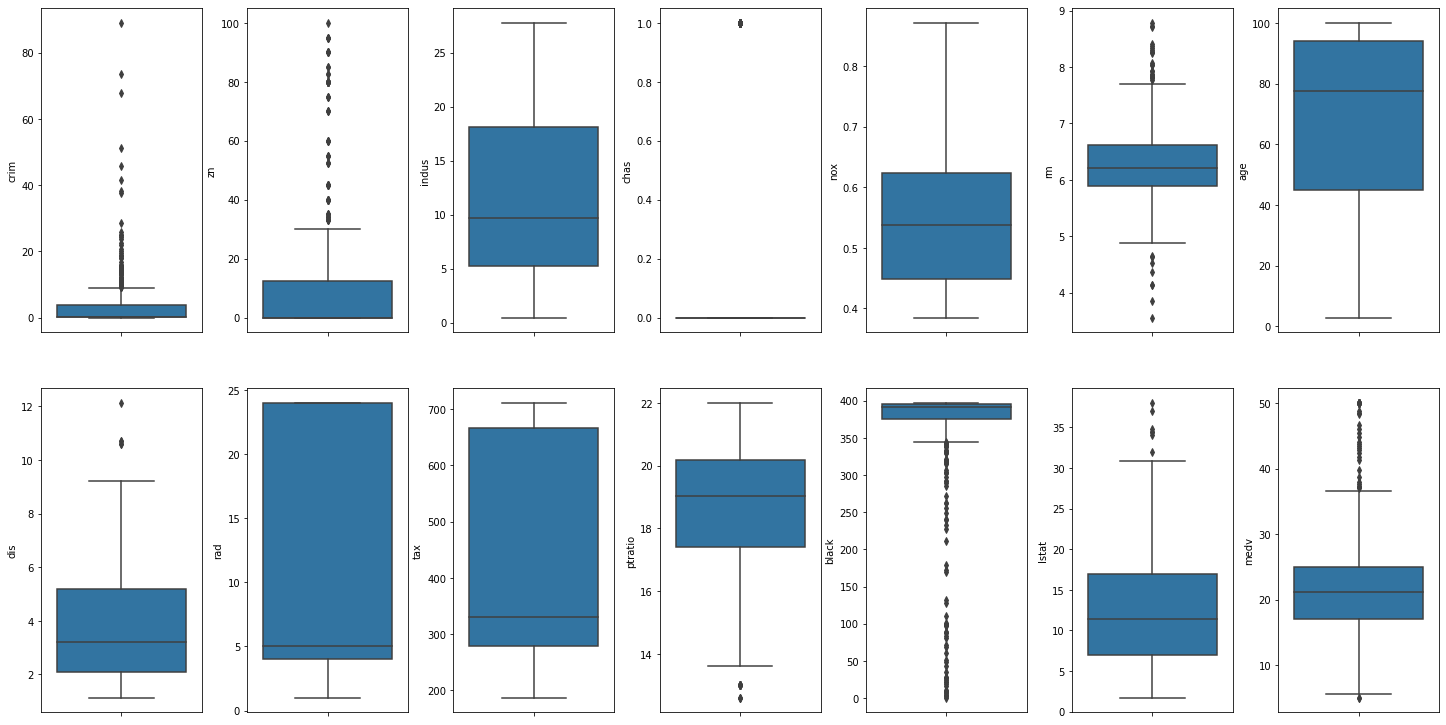

In [52]:
# creating boxplot to visualize all the data
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in t1.items():
    sns.boxplot(y=k, data=t1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<AxesSubplot:xlabel='indus', ylabel='Density'>

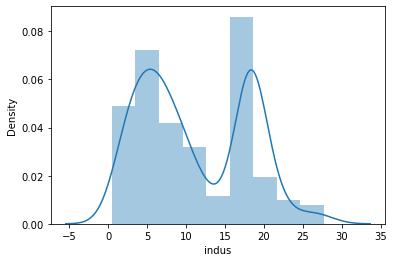

In [37]:
sns.distplot(t1['indus'])

<AxesSubplot:xlabel='nox', ylabel='Density'>

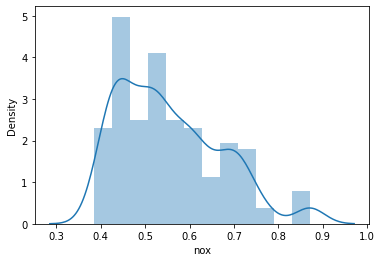

In [38]:
sns.distplot(t1['nox'])

<AxesSubplot:xlabel='rm', ylabel='Density'>

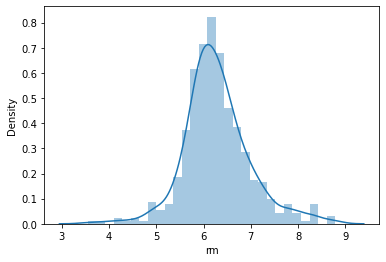

In [39]:
sns.distplot(t1['rm'])

<AxesSubplot:xlabel='age', ylabel='Density'>

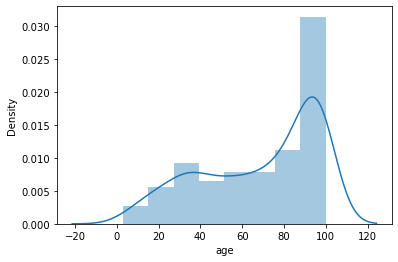

In [40]:
sns.distplot(t1['age'])

<AxesSubplot:xlabel='dis', ylabel='Density'>

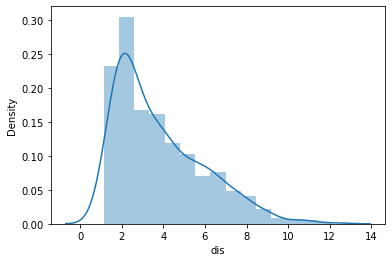

In [41]:
sns.distplot(t1['dis'])

<AxesSubplot:xlabel='rad', ylabel='Density'>

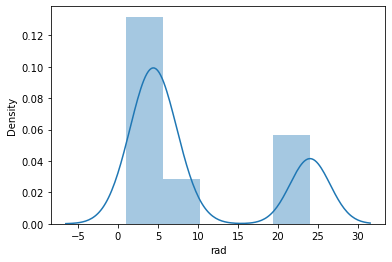

In [42]:
sns.distplot(t1['rad'])

<AxesSubplot:xlabel='tax', ylabel='Density'>

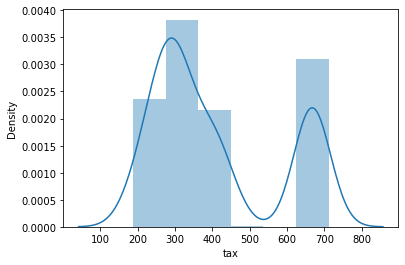

In [43]:
sns.distplot(t1['tax'])

<AxesSubplot:xlabel='lstat', ylabel='Density'>

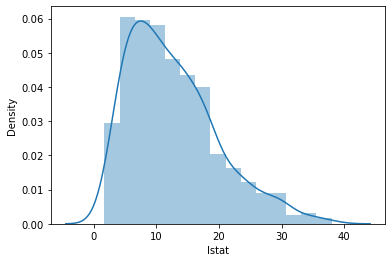

In [44]:
sns.distplot(t1['lstat'])

<AxesSubplot:xlabel='medv', ylabel='Density'>

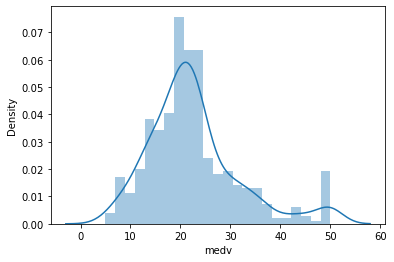

In [45]:
sns.distplot(t1['medv'])

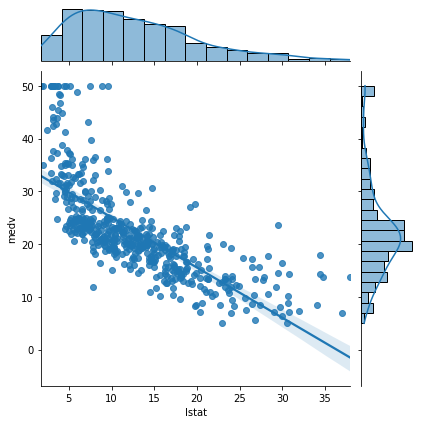

In [47]:
sns.jointplot('lstat','medv', data=t1, kind='reg');

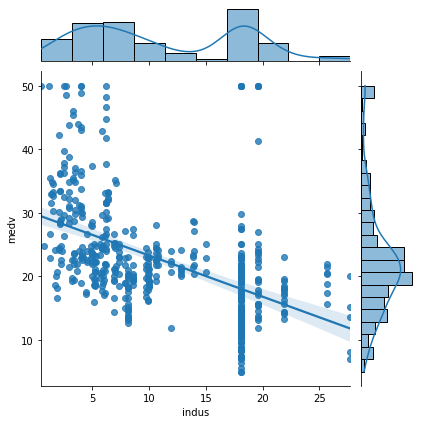

In [57]:
sns.jointplot('indus','medv', data=t1, kind='reg');

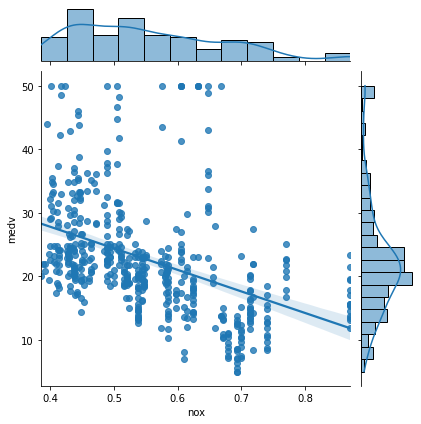

In [58]:
sns.jointplot('nox','medv', data=t1, kind='reg');

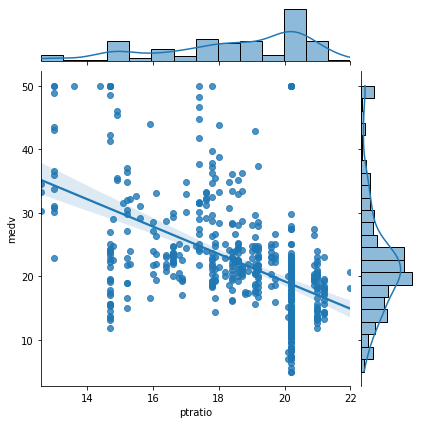

In [59]:
sns.jointplot('ptratio','medv', data=t1, kind='reg');

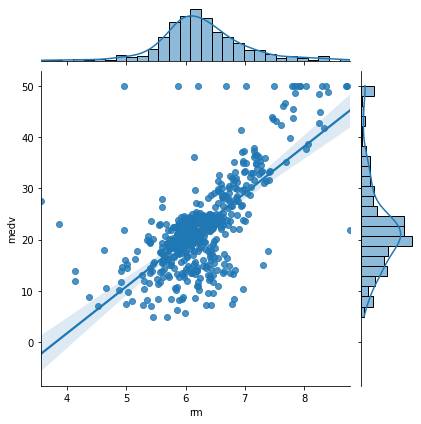

In [60]:
sns.jointplot('rm','medv', data=t1, kind='reg');

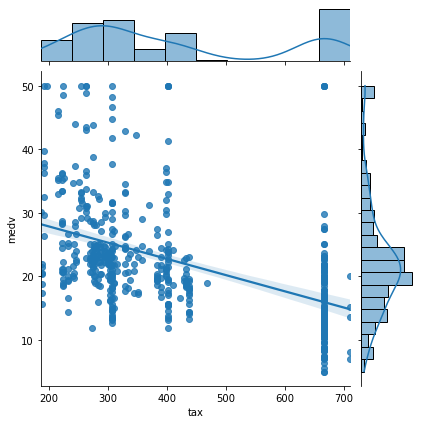

In [61]:
sns.jointplot('tax','medv', data=t1, kind='reg');

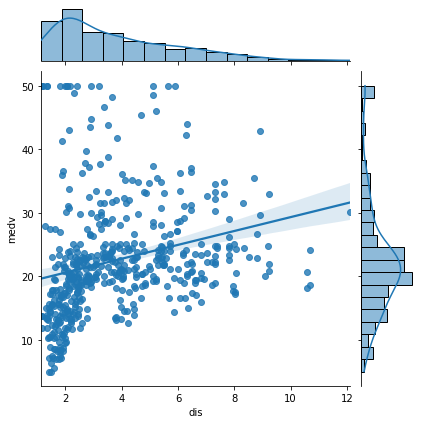

In [62]:
sns.jointplot('dis','medv', data=t1, kind='reg');

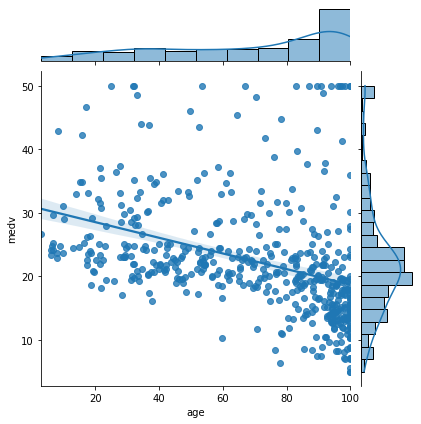

In [65]:
sns.jointplot('age','medv', data=t1, kind='reg');

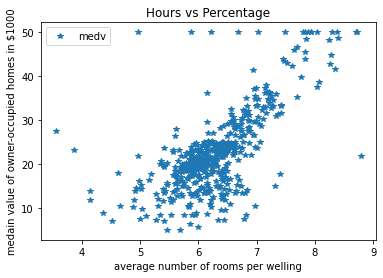

In [68]:
t1.plot(x='rm', y='medv', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('average number of rooms per welling')  
plt.ylabel('medain value of owner-occupied homes in $1000')  
plt.show()

#  Spliting the dataset as Independent variable X = Hours and Dependent variable Y = Scores

In [70]:
X = t1.iloc[:,:-1].values
y = t1.iloc[:,-1].values

In [72]:
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [73]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

# Spliting the Dataset into train dataset and test dataset

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [75]:
X_train.shape

(379, 13)

In [76]:
y_train.shape

(379,)

In [77]:
X_test.shape

(127, 13)

In [78]:
y_test.shape

(127,)

# Model Building 

In [79]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)

model.fit(X_train, y_train)

Ridge()

In [80]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [81]:
t1 = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred_test})  
t1

,Actual Values,Predicted Values
0,44.8,37.138901
1,17.1,18.804925
2,17.8,22.883614
3,33.1,32.338399
4,21.9,24.955352
...,...,...
122,12.5,19.731426
123,19.6,21.848233
124,19.7,14.537266
125,19.5,18.322096


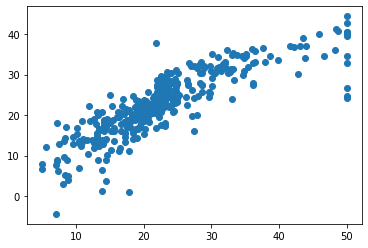

In [82]:
plt.scatter(y_train,y_pred_train)

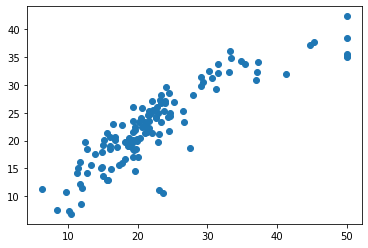

In [83]:
plt.scatter(y_test,y_pred_test)

# Model Evaluation

In [84]:
from sklearn.metrics import mean_absolute_error,r2_score

In [86]:
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred_test))

Mean Absolute Error:  3.186135319430206


In [87]:
print('R2 Score is :',r2_score(y_test,y_pred_test))

R2 Score is : 0.760757695339656
